# 연습 

### 데이터 불러오기 및 시각화 

In [1]:
import matplotlib.pyplot as plt

from torchvision.datasets.cifar import CIFAR10
from torchvision.transforms import ToTensor

In [2]:
train_data = CIFAR10(
    root='./',
    train=True,
    download=True,
    transform=ToTensor())

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./cifar-10-python.tar.gz to ./


In [3]:
test_data = CIFAR10(
    root='./',
    train=False,
    download=True,
    transform=ToTensor())

Files already downloaded and verified


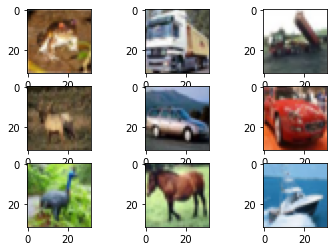

In [4]:
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(train_data.data[i])
plt.show()

### 데이터 증강 

In [5]:
import torchvision.transforms as T
from torchvision.transforms import Compose
from torchvision.transforms import RandomHorizontalFlip, RandomCrop

In [6]:
# 증강기 정의
transforms = Compose([
    T.ToPILImage(),
    RandomCrop((32, 32), padding=4),
    RandomHorizontalFlip(p=0.5)
])

In [7]:
# 증강기를 적용하여 다시 데이터 임포트
train_data = CIFAR10(
    root='./',
    train=True,
    download=True,
    transform=transforms)

Files already downloaded and verified


In [8]:
test_data = CIFAR10(
    root='./',
    train=False,
    download=True,
    transform=transforms)

Files already downloaded and verified


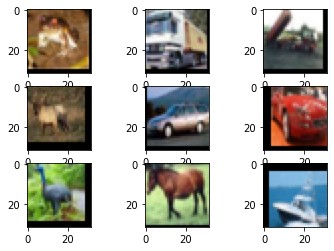

In [9]:
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(transforms(train_data.data[i]))
plt.show()

In [10]:
transforms = Compose([
    T.ToPILImage(),
    RandomCrop((32, 32), padding=4),
    RandomHorizontalFlip(p=0.5),
    T.ToTensor(),
    T.Normalize(mean=(0.49, 0.4822, 0.446),
              std=(0.245, 0.244, 0.251)),
    T.ToPILImage()
])

In [11]:
test_data = CIFAR10(
    root='./',
    train=False,
    download=True,
    transform=transforms)

train_data = CIFAR10(
    root='./',
    train=True,
    download=True,
    transform=transforms)

Files already downloaded and verified
Files already downloaded and verified


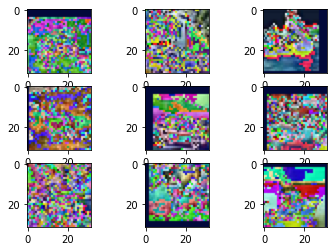

In [12]:
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(transforms(train_data.data[i]))
plt.show()

### 이미지의 평균과 표준편차를 구하는 코드 

In [13]:
import torch

train_data = CIFAR10(
    root='./',
    train=True,
    download=True,
    transform=ToTensor()
)

imgs = [i[0] for i in train_data] # 이미지 텐서
imgs = torch.stack(imgs, dim=0).numpy() # 이미지 붙이기

# 평균 구하기
mean_r = imgs[:, 0, :, :].mean()
mean_g = imgs[:, 1, :, :].mean()
mean_b = imgs[:, 2, :, :].mean()

# 표준편차 구하기
std_r = imgs[:, 0, :, :].std()
std_g = imgs[:, 0, :, :].std()
std_b = imgs[:, 0, :, :].std()

print(mean_r, mean_g, mean_b)
print(std_r, std_g, std_b)

Files already downloaded and verified
0.49139968 0.48215827 0.44653124
0.24703233 0.24703233 0.24703233


# 시작 

### 데이터 불러오기 및 증강 

In [14]:
import torchvision.transforms as T

transform = T.Compose([
    T.RandomCrop((32, 32), padding=4),
    T.RandomHorizontalFlip(p=0.5),
    T.ToTensor(),
    T.Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.247, 0.243, 0.261))
])

In [15]:
train_data = CIFAR10(
    root = './',
    train=True,
    download=True,
    transform=transform
)

test_data = CIFAR10(
    root = './',
    train=False,
    download=True,
    transform=transform
)

Files already downloaded and verified
Files already downloaded and verified


### 데이터로더 정의 

In [16]:
from torch.utils.data.dataloader import DataLoader

In [17]:
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

### 학습 프로세서 정의 

In [18]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

### 모델링 

In [19]:
import torch
import torch.nn as nn

In [20]:
# 블록 제작

class BasicBlock(nn.Module):

  # init 함수에 층 정의의
  def __init__(self, in_channels, out_channels, hidden_dim):
    super(BasicBlock, self).__init__()
    self.conv1 = nn.Conv2d(in_channels, hidden_dim,
                           kernel_size=3, padding=1)
    self.conv2 = nn.Conv2d(hidden_dim, out_channels,
                           kernel_size=3, padding=1)
    self.relu = nn.ReLU()
    self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

  def forward(self, x):
    x = self.conv1(x)
    x = self.relu(x)
    x = self.conv2(x)
    x = self.relu(x)
    x = self.pool(x)

    return x



In [21]:
# VGG 모델 구현
class CNN(nn.Module):
  def __init__(self, num_classes):
    super(CNN, self).__init__()

    # 블록 쌓기
    self.block1 = BasicBlock(in_channels=3, out_channels=32, hidden_dim=16)
    self.block2 = BasicBlock(in_channels=32, out_channels=128, hidden_dim=64)
    self.block3 = BasicBlock(in_channels=128, out_channels=256, hidden_dim=128)

    # 분류기
    self.fc1 = nn.Linear(in_features=4096, out_features=2048)
    self.fc2 = nn.Linear(in_features=2048, out_features=256)
    self.fc3 = nn.Linear(in_features=256, out_features=num_classes)

    # 활성화함수
    self.relu = nn.ReLU()

  def forward(self, x):
    x = self.block1(x)
    x = self.block2(x)
    x = self.block3(x)
    x = torch.flatten(x, start_dim=1)

    x = self.fc1(x)
    x = self.relu(x)
    x = self.fc2(x)
    x = self.relu(x)
    x = self.fc3(x)

    return x

In [22]:
model = CNN(num_classes=10)
model.to(device)

CNN(
  (block1): BasicBlock(
    (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu): ReLU()
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): BasicBlock(
    (conv1): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu): ReLU()
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block3): BasicBlock(
    (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu): ReLU()
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=4096, out_features=2048, bias=True)
  (fc2): Linear(in_features=2048, out_features=256,

### 모델 학습 

In [23]:
from torch.optim.adam import Adam
lr = 0.001
optim = Adam(model.parameters(), lr=lr)

In [24]:
# 학습
epochs = 10

for epoch in range(epochs):
  for X, y in train_loader:
    optim.zero_grad()
    preds = model(X.to(device))
    loss = nn.CrossEntropyLoss()(preds, y.to(device))
    loss.backward()
    optim.step()

  if epoch==0 or epoch%10==9:
    print(f'epoch: {epoch+1} loss:{loss.item()}')

#모델 저장
torch.save(model.state_dict(), 'CIFAR.pth')

epoch: 1 loss:1.3599226474761963
epoch: 10 loss:0.6335089206695557


In [28]:
# 성능 평가

# 모델 불러오기
model.load_state_dict(torch.load('CIFAR.pth', map_location=device))

# 정확도 초기화
num_corr = 0

with torch.no_grad():
  for X, y in test_loader:
    output = model(X.to(device))
    preds = output.data.max(1)[1]
    corr = preds.eq(y.to(device).data).sum().item()
    num_corr += corr

num_corr / len(test_data)

0.7718